In [141]:
import matplotlib.pyplot as plt
%matplotlib inline

In [146]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.manifold import TSNE
from sklearn.neighbors import NearestNeighbors

In [3]:
import pickle

In [33]:
with open('book_vec_df.pickle','rb') as read_file:
    book_vecs_df = pickle.load(read_file)

In [1]:
from sklearn.cluster import KMeans, MiniBatchKMeans

def cluster_books(book_vecs, n_clusters, random_st):
    km = KMeans(n_clusters, random_state=random_st)
    cluster_labels=km.fit_predict(book_vecs)

    return cluster_labels

In [117]:
nan_list = [488,838,1371,1834,3122,3382,4044,4118,4190,4398,4420,4474,4515,4590,4664,4759,4825,4959,
            4979,5243,5372,5705,6069,6118,6912,7023,7241,7449,7605,7822,7936,7962,8402,8881,9007,9038,
            9077,9220,9242,9326,9569,9609,9729,9769,9828,9857,9966]

In [134]:
book_vecs_df = book_vecs_df.drop(nan_list)

In [135]:
book_vecs = book_vecs_df.drop(columns = 'Title')

In [136]:
book_vecs

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.309896,0.188802,-0.0939128,0.123861,-0.0828044,-0.000569661,-0.0265198,-0.12207,0.0405273,-0.0275879,...,-0.0184326,0.026001,-0.106232,0.117676,-0.0585938,-0.257812,-0.0630697,-0.0940348,0.0104167,0.244792
1,-0.153551,0.114421,0.0552843,0.123779,0.0534058,-0.0287035,-0.120524,-0.0354818,-0.0353122,0.00936551,...,0.0878635,0.0431179,-0.0819651,0.11849,-0.0863037,-0.16097,-0.142415,0.00590006,-0.141466,0.201226
2,-0.103271,0.121918,0.129089,0.106628,0.0317459,0.0441895,-0.0594482,-0.0631104,0.0505371,0.0208282,...,0.171814,-0.145142,-0.197388,0.134888,-0.0406494,-0.206665,-0.0401611,0.0108337,-0.0812988,0.19873
3,-0.178296,0.198242,0.0210449,0.0714355,-0.0183228,0.00327148,-0.12251,-0.0345703,-0.0378052,0.0402954,...,0.132275,-0.0161377,-0.139941,0.0828125,-0.0464355,-0.197754,-0.133789,-0.0171143,-0.168848,0.191309
4,0.106201,-0.0926514,0.0718994,0.0491943,-0.0872498,-0.0217266,0.150391,-0.174377,0.113525,0.13269,...,0.0280151,-0.0536499,-0.156982,0.177979,-0.0770874,0.0236206,-0.144073,-0.0972595,-0.0545044,0.110931
5,-0.179901,0.0880432,0.0504557,0.165446,-0.0650431,0.0303497,-0.0646566,-0.047526,-0.0535482,-0.00084432,...,0.0561523,-0.031189,-0.0347087,0.114827,-0.0566406,-0.135254,-0.101562,-0.0296631,-0.133545,0.152334
6,-0.168811,0.0969727,0.0492188,0.137939,-0.0901672,0.0105042,-0.0994141,-0.0581543,-0.0155334,0.0511292,...,0.106934,0.0516113,-0.0830078,0.0724121,-0.0715332,-0.181982,-0.14541,-0.0353882,-0.171021,0.104797
7,-0.168811,0.0969727,0.0492188,0.137939,-0.0901672,0.0105042,-0.0994141,-0.0581543,-0.0155334,0.0511292,...,0.106934,0.0516113,-0.0830078,0.0724121,-0.0715332,-0.181982,-0.14541,-0.0353882,-0.171021,0.104797
8,-0.13205,0.137065,-0.00738525,0.143555,-0.0277913,0.050649,-0.136149,-0.00805664,-0.0909831,0.0671488,...,0.0648193,-0.0298462,-0.0994466,0.11672,-0.0555827,-0.129395,-0.0832723,-0.0104574,-0.147217,0.0989787
9,-0.144999,0.119995,0.0611572,0.115356,-0.106934,0.0362193,-0.149902,-0.099528,-0.0692342,0.00741577,...,0.0643311,0.031189,-0.119367,0.0597331,-0.0182088,-0.122803,-0.127197,-0.0496623,-0.134196,0.151377


In [ ]:
#find optimal value for k

SSE = []

for k in range(2,100):
    km = KMeans(n_clusters = k, random_state = 42)
    km.fit(book_vecs)
    labels = km.labels_
    SSE.append(km.inertia_)
    
plt.figure(dpi = 150)
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.plot(range(2,30),SSE);
#plt.ylim((0,600))

plt.savefig("cluster_plot")

In [150]:
book_clusts = cluster_books(book_vecs, 16, 42)

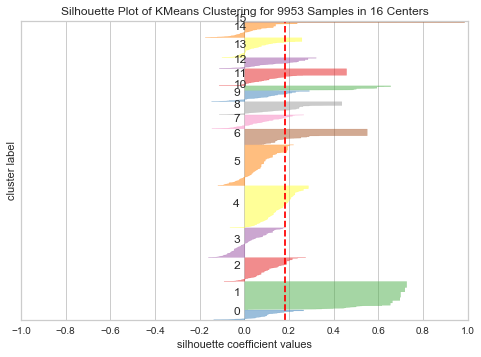

In [147]:
visualiser = SilhouetteVisualizer(KMeans(n_clusters=16), random_state = 42)
visualiser.fit(book_vecs)
visualiser.poof()

In [149]:
tsne_model = TSNE(n_components=2, random_state = 42, verbose = 0)
low_data = tsne_model.fit_transform(book_vecs)

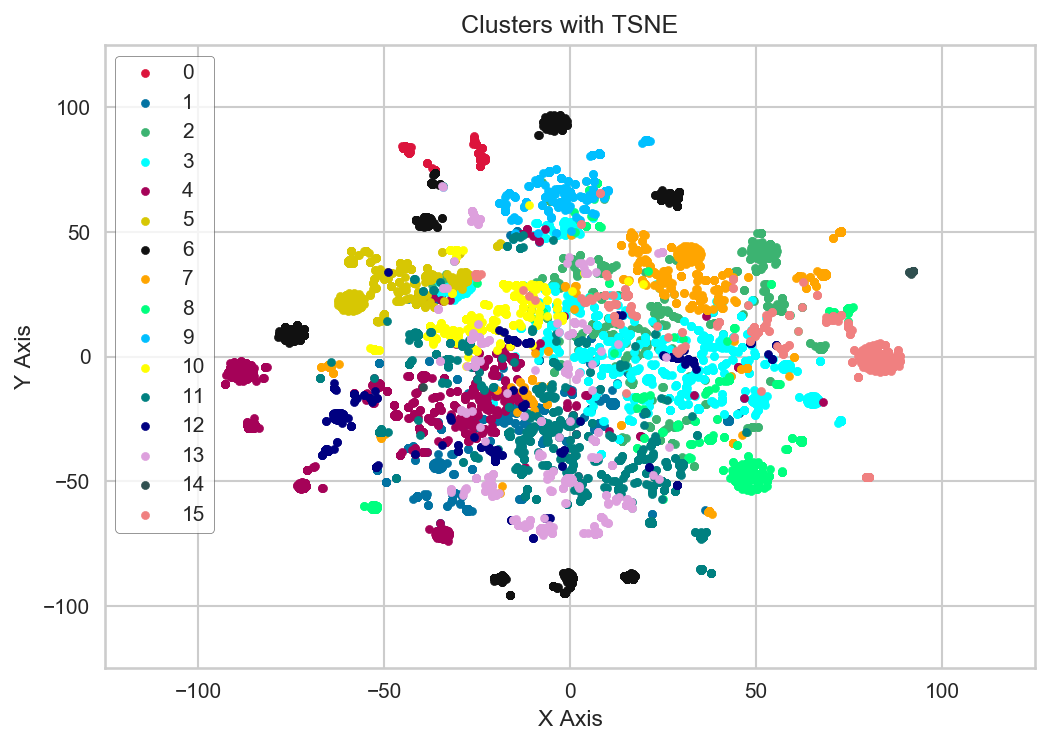

<Figure size 576x396 with 0 Axes>

In [152]:
colors = (['crimson','b','mediumseagreen','cyan','m','y', 'k', 'orange', 'springgreen', 'deepskyblue', 'yellow', 'teal', 'navy', 'plum', 'darkslategray', 'lightcoral', 'papayawhip'])
plt.figure(dpi = 150)

for i, c, label in zip (range(16), colors, list(range(16))):
    plt.scatter(low_data[book_clusts == i, 0], low_data[book_clusts == i, 1], c=c, label = label, s = 15, alpha = 1)

plt.legend(fontsize = 10, loc = 'upper left', frameon = True, facecolor = '#FFFFFF', edgecolor = '#333333');
plt.title("Clusters with TSNE", fontsize = 12);
plt.xlim(-125,125);
plt.ylim(-125,125);
plt.ylabel("Y Axis");
plt.xlabel("X Axis");
plt.yticks(fontsize =10);
plt.xticks(fontsize = 10);
plt.show()
plt.savefig("tsne_plot")